In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, re
import statsmodels.api as sm
import pptx
from pptx.util import Inches, Pt
from matplotlib.ticker import MultipleLocator
import datetime

## Import various microsoft object API structures
from pptx.enum.dml import MSO_THEME_COLOR
from pptx.chart.data import ChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.enum.shapes import MSO_SHAPE
from pptx.enum.dml import MSO_LINE
from pptx.enum.chart import XL_LABEL_POSITION
from pptx.enum.chart import XL_TICK_MARK
from pptx.compat import to_unicode
from pptx.dml.fill import FillFormat
from pptx.enum.dml import MSO_FILL
from pptx.enum.lang import MSO_LANGUAGE_ID
from pptx.enum.text import MSO_AUTO_SIZE, MSO_UNDERLINE
%matplotlib inline

In [2]:
## setting colors, shapes, lines, formatting, and other parameters for placeholder use

### Donut chart formatting
donut_blue = pptx.dml.color.RGBColor.from_string('0E2B5A')
donut_gray = pptx.dml.color.RGBColor.from_string('E2E2E3')
donut_borders = pptx.dml.color.RGBColor.from_string('FFFFFF')
donut_line_width = Pt(2.5)

### Donut chart sizing
donut_height = Inches(1.88)
donut_width = Inches(1.88)
donut_horiz = Inches(11.01)
donut_vert = Inches(-0.04)

### Subpop colors
asian_color = pptx.dml.color.RGBColor.from_string('E87722')
white_color = pptx.dml.color.RGBColor.from_string('5D7975')
all_color = pptx.dml.color.RGBColor.from_string('0E2B5A')
all_tn_color = pptx.dml.color.RGBColor.from_string('EE3424')
hispanic_color = pptx.dml.color.RGBColor.from_string('B1B62B')
black_color = pptx.dml.color.RGBColor.from_string('2DCCD3')
ED_color = pptx.dml.color.RGBColor.from_string('3C3E40')
EL_Tran_color = pptx.dml.color.RGBColor.from_string('6E7073')
EL_color = pptx.dml.color.RGBColor.from_string('7030A0')
SWD_color = pptx.dml.color.RGBColor.from_string('00B050')

### Line chart colors and formatting
grid_color = pptx.dml.color.RGBColor.from_string('E1E2E3')
axes_color = pptx.dml.color.RGBColor.from_string('7E8286')
axes_font_size = Pt(9)
line_width = Pt(2) ## this is the width for the crowded line plot
all_line_width = Pt(2.75) ## for the district state plot
all_tn_line_width = Pt(3)
all_tn_line_style = MSO_LINE.ROUND_DOT

In [3]:
import numpy as np

def createStackedBarChartPlot(ax, data): 
    rows = len(data)
    ind = np.arange(rows)

    width = 0.55
    
    below = ax.bar(ind, data['pct_below'], width, bottom= data['pct_met_expectations'] +  data['pct_exceeded_expectations'] + data['pct_approaching'], color='#F5857C')
    approaching = ax.bar(ind, data['pct_approaching'], width, bottom= data['pct_met_expectations'] +  data['pct_exceeded_expectations'], color='#F1AD7A')
    met = ax.bar(ind, data['pct_met_expectations'], width, bottom= data['pct_exceeded_expectations'], color='#D2D755')
    exceeded = ax.bar(ind, data['pct_exceeded_expectations'], width, color='#2DCCD3')

    ax.bar_label(below, label_type='center', color='#FFFFFF', padding=25, fontsize=8)
    ax.bar_label(approaching, label_type='center', color='#FFFFFF', padding=3, fontsize=8)
    ax.bar_label(met, label_type='center', padding=3, fontsize=8)
    ax.bar_label(exceeded, label_type='center', padding=1, fontsize=8)

    ax.set_yticks(np.arange(10, 101, 10))
    ax.set_xticks(ind, data.index.array)
    ax.set_ylim(bottom=0, top=100)

    columnLine = data['pct_met_expectations'] + data['pct_exceeded_expectations']
    data['line_data'] = columnLine

    ax2 = ax.twinx()
    ax2.plot(ind, data['line_data'], marker=".", color="#000000")
    ax2.sharey(ax)


    fig.set_figwidth(17)
    fig.set_figheight(10)

    return ax

<function matplotlib.pyplot.show(close=None, block=None)>

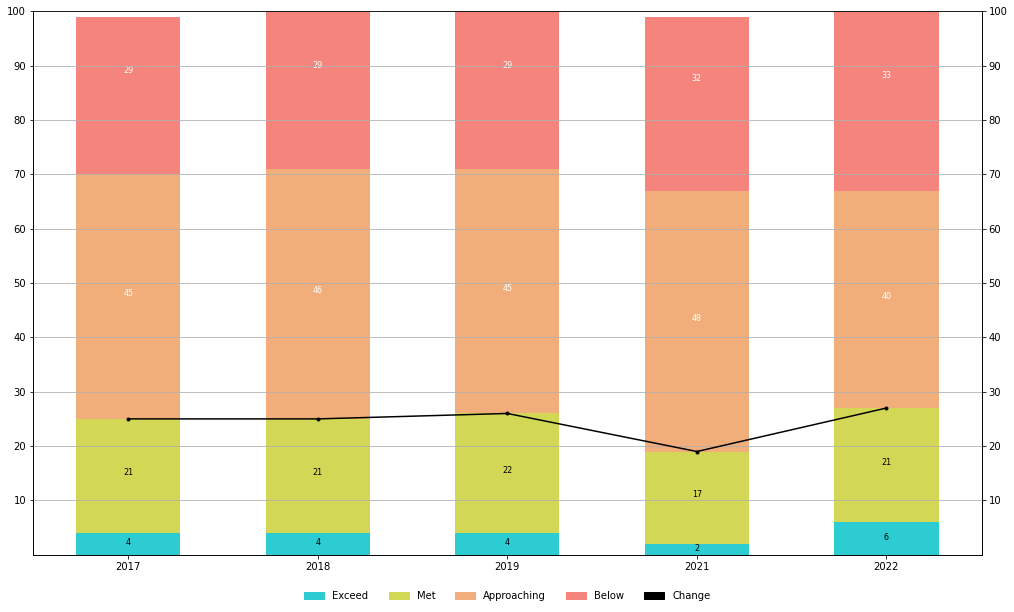

In [6]:
###SLide 1

import numpy as np
import matplotlib.patches as mpatches

df = pd.read_csv("data.csv")
df.shape

dataFrame = df[df.subgroup.isin(['All Students']) & df.subject_area.isin(['ELA']) & df.grade.isin(['All Grades']) & df.system.isin([190])][['year', 'n_below', 'n_approaching', 'n_met_expectations', 'n_exceeded_expectations', 'valid_tests']]

years = [2022, 2021, 2019, 2018, 2017]
data = pd.DataFrame({}, columns=['year', 'pct_below', 'pct_approaching', 'pct_met_expectations', 'pct_exceeded_expectations']);

for y in years:
    d = dataFrame[dataFrame.year == y]

    dBelow = sum(d['n_below']) / sum(d['valid_tests']) * 100
    dApproach = sum(d['n_approaching']) / sum(d['valid_tests']) * 100
    dMet = sum(d['n_met_expectations']) / sum(d['valid_tests']) * 100
    dExceed = sum(d['n_exceeded_expectations']) / sum(d['valid_tests']) * 100
    row = {'year' : y, 'pct_below' : round(dBelow), 'pct_approaching' :round(dApproach), 'pct_met_expectations': round(dMet), 'pct_exceeded_expectations': round(dExceed)}
    data = data.append(row, ignore_index=True)

data.set_index('year', inplace=True)
data.sort_index(ascending=True, inplace=True)

fig, ax = plt.subplots(sharex='all', sharey='all')
createStackedBarChartPlot(ax, data)

exceed_patch = mpatches.Patch(color='#2DCCD3', label="Exceed")
met_patch = mpatches.Patch(color='#D2D755', label="Met")
approaching_patch = mpatches.Patch(color='#F1AD7A', label="Approaching")
below_patch = mpatches.Patch(color='#F5857C', label="Below")
change_patch = mpatches.Patch(color="#000000", label="Change")
fig.set_figwidth(17)
fig.set_figheight(10)

plt.legend(loc="lower center", bbox_transform=fig.transFigure, ncol=5, handles=[exceed_patch, met_patch, approaching_patch, below_patch, change_patch], borderaxespad=-5, frameon=False)
plt.grid(axis = 'y')
plt.show


C:\Users\mmasl\AppData\Local\Temp\ipykernel_30416\2153168688.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elementary['line_data'] = e_columnLine
C:\Users\mmasl\AppData\Local\Temp\ipykernel_30416\2153168688.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle['line_data'] = m_columnLine
C:\Users\mmasl\AppData\Local\Temp\ipykernel_30416\2153168688.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

<function matplotlib.pyplot.show(close=None, block=None)>

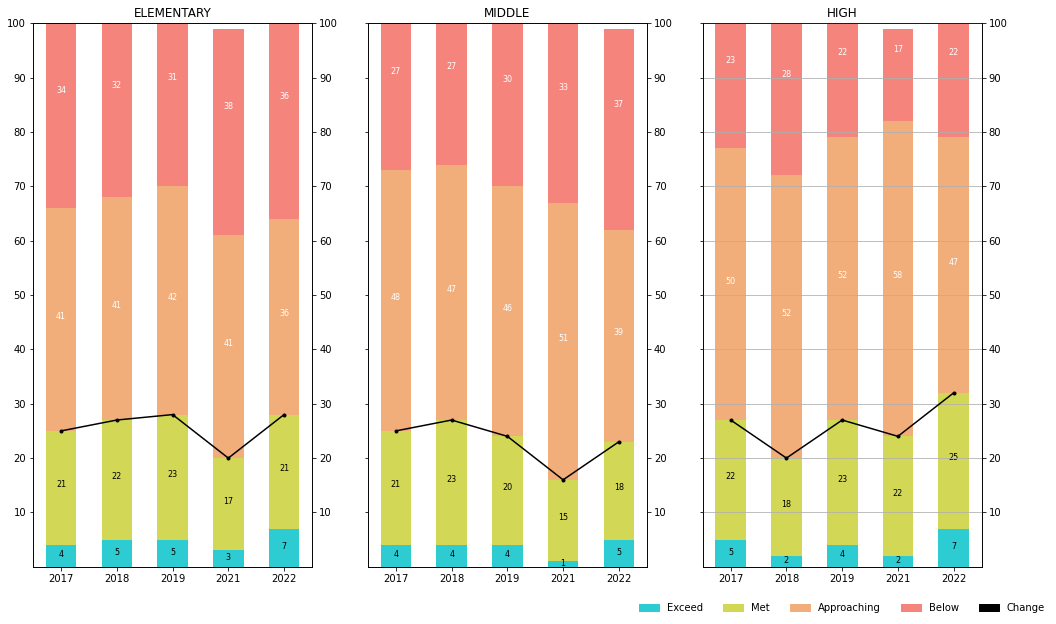

In [58]:
##SLide 2

import numpy as np
import matplotlib.patches as mpatches
from pandas.core.base import PandasObject
pd.set_option('display.max_rows', 500)

df = pd.read_csv("data.csv")
df.shape

grade_band = ['Elementary School', 'Middle School', 'High School']
dataFrame = df[df.subgroup.isin(['All Students']) & df.subject_area.isin(['ELA']) & df.grade_band.isin(grade_band) & df.system.isin([190])][['year', 'grade_band', 'n_below', 'n_approaching', 'n_met_expectations', 'n_exceeded_expectations', 'valid_tests']]

years = [2022, 2021, 2019, 2018, 2017]
data = pd.DataFrame({}, columns=['year', 'pct_below', 'pct_approaching', 'pct_met_expectations', 'pct_exceeded_expectations'])

for gb in grade_band:
    q = [gb]
    gradeR  = dataFrame[dataFrame.grade_band.isin(q)]

    for y in years:
        d = gradeR[gradeR.year == y]

        dBelow = sum(d['n_below']) / sum(d['valid_tests']) * 100
        dApproach = sum(d['n_approaching']) / sum(d['valid_tests']) * 100
        dMet = sum(d['n_met_expectations']) / sum(d['valid_tests']) * 100
        dExceed = sum(d['n_exceeded_expectations']) / sum(d['valid_tests']) * 100
        row = {'year' : y, 'grade_band':gb, 'pct_below' : round(dBelow), 'pct_approaching' :round(dApproach), 'pct_met_expectations': round(dMet), 'pct_exceeded_expectations': round(dExceed)}

        data = data.append(row, ignore_index=True)

data.set_index('year', inplace=True)
data.sort_index(ascending=True, inplace=True)

width = 0.55
fig, ax = plt.subplots(1, 3, sharex='all', sharey='all')

elementary = data[data.grade_band.isin(["Elementary School"])]
rows = len(elementary)
ind = np.arange(rows)

below = ax[0].bar(ind, elementary['pct_below'], width, bottom= elementary['pct_met_expectations'] +  elementary['pct_exceeded_expectations'] + elementary['pct_approaching'], color='#F5857C')
approaching = ax[0].bar(ind, elementary['pct_approaching'], width, bottom= elementary['pct_met_expectations'] +  elementary['pct_exceeded_expectations'], color='#F1AD7A')
met = ax[0].bar(ind, elementary['pct_met_expectations'], width, bottom= elementary['pct_exceeded_expectations'], color='#D2D755')
exceeded = ax[0].bar(ind, elementary['pct_exceeded_expectations'], width, color='#2DCCD3')
ax[0].title.set_text("ELEMENTARY")
ax[0].bar_label(below, label_type='center', color='#FFFFFF', padding=25, fontsize=8)
ax[0].bar_label(approaching, label_type='center', color='#FFFFFF', padding=3, fontsize=8)
ax[0].bar_label(met, label_type='center', padding=3, fontsize=8)
ax[0].bar_label(exceeded, label_type='center', padding=1, fontsize=8)

ax[0].set_yticks(np.arange(10, 101, 10))
ax[0].set_xticks(ind, elementary.index.array)
ax[0].set_ylim(bottom=0, top=100)

e_columnLine = elementary['pct_met_expectations'] + elementary['pct_exceeded_expectations']
elementary['line_data'] = e_columnLine

ax2 = ax[0].twinx()
ax2.plot(ind, elementary['line_data'], marker=".", color="#000000")
ax2.sharey(ax[0])

middle = data[data.grade_band.isin(["Middle School"])]
rows = len(middle)
ind = np.arange(rows)

below = ax[1].bar(ind, middle['pct_below'], width, bottom= middle['pct_met_expectations'] +  middle['pct_exceeded_expectations'] + middle['pct_approaching'], color='#F5857C')
approaching = ax[1].bar(ind, middle['pct_approaching'], width, bottom= middle['pct_met_expectations'] +  middle['pct_exceeded_expectations'], color='#F1AD7A')
met = ax[1].bar(ind, middle['pct_met_expectations'], width, bottom= middle['pct_exceeded_expectations'], color='#D2D755')
exceeded = ax[1].bar(ind, middle['pct_exceeded_expectations'], width, color='#2DCCD3')
ax[1].title.set_text("MIDDLE")
ax[1].bar_label(below, label_type='center', color='#FFFFFF', padding=25, fontsize=8)
ax[1].bar_label(approaching, label_type='center', color='#FFFFFF', padding=3, fontsize=8)
ax[1].bar_label(met, label_type='center', padding=3, fontsize=8)
ax[1].bar_label(exceeded, label_type='center', padding=1, fontsize=8)

ax[1].set_yticks(np.arange(10, 101, 10))
ax[1].set_xticks(ind, middle.index.array)
ax[1].set_ylim(bottom=0, top=100)

m_columnLine = middle['pct_met_expectations'] + middle['pct_exceeded_expectations']
middle['line_data'] = m_columnLine

ax2 = ax[1].twinx()
ax2.plot(ind, middle['line_data'], marker=".", color="#000000")
ax2.sharey(ax[1])

highSchool = data[data.grade_band.isin(["High School"])]
rows = len(highSchool)
ind = np.arange(rows)

below = ax[2].bar(ind, highSchool['pct_below'], width, bottom= highSchool['pct_met_expectations'] +  highSchool['pct_exceeded_expectations'] + highSchool['pct_approaching'], color='#F5857C')
approaching = ax[2].bar(ind, highSchool['pct_approaching'], width, bottom= highSchool['pct_met_expectations'] +  highSchool['pct_exceeded_expectations'], color='#F1AD7A')
met = ax[2].bar(ind, highSchool['pct_met_expectations'], width, bottom= highSchool['pct_exceeded_expectations'], color='#D2D755')
exceeded = ax[2].bar(ind, highSchool['pct_exceeded_expectations'], width, color='#2DCCD3')
ax[2].title.set_text("HIGH")
ax[2].bar_label(below, label_type='center', color='#FFFFFF', padding=25, fontsize=8)
ax[2].bar_label(approaching, label_type='center', color='#FFFFFF', padding=3, fontsize=8)
ax[2].bar_label(met, label_type='center', padding=3, fontsize=8)
ax[2].bar_label(exceeded, label_type='center', padding=1, fontsize=8)

ax[2].set_yticks(np.arange(10, 101, 10))
ax[2].set_xticks(ind, highSchool.index.array)
ax[2].set_ylim(bottom=0, top=100)

h_columnLine = highSchool['pct_met_expectations'] + highSchool['pct_exceeded_expectations']
highSchool['line_data'] = h_columnLine

ax2 = ax[2].twinx()
ax2.plot(ind, highSchool['line_data'], marker=".", color="#000000")
ax2.sharey(ax[2])

exceed_patch = mpatches.Patch(color='#2DCCD3', label="Exceed")
met_patch = mpatches.Patch(color='#D2D755', label="Met")
approaching_patch = mpatches.Patch(color='#F1AD7A', label="Approaching")
below_patch = mpatches.Patch(color='#F5857C', label="Below")
change_patch = mpatches.Patch(color="#000000", label="Change")

plt.legend(loc="lower center", bbox_transform=fig.transFigure, ncol=5, handles=[exceed_patch, met_patch, approaching_patch, below_patch, change_patch], borderaxespad=-5, frameon=False)
plt.grid(axis = 'y')
fig.set_figwidth(17)
fig.set_figheight(10)
plt.show




In [245]:
Current_template = 'Demo_Template.pptx'
file_name = 'Demo.pptx'

prs = pptx.Presentation(Current_template)
prs.save(file_name)
prs = pptx.Presentation(file_name)

slide1 = prs.slides[0]

title = slide1.placeholders[0]
title.text = "This is a test"

prs.save(file_name)
